In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [4]:
from sklearn.compose import make_column_selector as selector

In [5]:
from sklearn.feature_selection import chi2

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [7]:
df3 = pd.read_csv('./SBAnational_final.CSV', index_col='LoanNr_ChkDgt')

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  int64  
 5   NoEmp          235206 non-null  int64  
 6   NewExist       235206 non-null  int64  
 7   FranchiseCode  235206 non-null  int64  
 8   UrbanRural     235206 non-null  int64  
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 30.5+ MB


In [9]:
df3['UrbanRural'] = df3['UrbanRural'].astype(str)
df3['NAICS'] = df3['NAICS'].astype(str)
df3['NoEmp'] = df3['NoEmp'].astype(str)
df3['NewExist'] = df3['NewExist'].astype(str)
df3['FranchiseCode'] = df3['FranchiseCode'].astype(str)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  object 
 5   NoEmp          235206 non-null  object 
 6   NewExist       235206 non-null  object 
 7   FranchiseCode  235206 non-null  object 
 8   UrbanRural     235206 non-null  object 
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 30.5+ MB


In [11]:
columns_to_encode = ['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
columns_to_scale  = ['Term', 'CreateJob', 'RetainedJob', 'GrAppv']
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(df3[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df3[columns_to_encode])

In [12]:
encoded_columns.shape

(235206, 23464)

In [13]:
test2= SelectKBest(chi2, k=1000)
fit3= test2.fit(encoded_columns, df3['MIS_Status'])
features2=fit3.transform(encoded_columns)
scores = pd.DataFrame(fit3.scores_)

In [14]:
features2.shape

(235206, 1000)

In [15]:
import numpy as np
processed_data = np.concatenate([scaled_columns, features2], axis=1)

In [16]:
print(pd.DataFrame(processed_data).head(1))

   0     1     2         3     4     5     6     7     8     9     ...  994   \
0   0.4   0.0   0.0  0.243615   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   995   996   997   998   999   1000  1001  1002  1003  
0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  

[1 rows x 1004 columns]


# Splitting data , Neural Network MLP model , accuracy, precision, recall, ROC

In [17]:
from sklearn.neural_network import MLPClassifier
from scipy import sparse

In [18]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(sparse.csr_matrix(processed_data), df3['MIS_Status'], test_size=0.3, random_state=0)

In [20]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [21]:
y_pred_mlp = mlp_clf.predict(X_test)
print('Accuracy of mlp classifier on test set: {:.2f}'.format(mlp_clf.score(X_test, y_test)))

Accuracy of mlp classifier on test set: 0.85


In [22]:
confusion_matrix3 = confusion_matrix(y_test, y_pred_mlp)
print(confusion_matrix3)

[[30646  4594]
 [ 5941 29381]]


In [23]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     35240
           1       0.86      0.83      0.85     35322

    accuracy                           0.85     70562
   macro avg       0.85      0.85      0.85     70562
weighted avg       0.85      0.85      0.85     70562



In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
mlp_probs= mlp_clf.predict_proba(X_test)

In [25]:
mlp_probs1= mlp_probs[:, 1]

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, mlp_probs1)
mlp_roc_auc = roc_auc_score(y_test, mlp_probs1)

In [27]:
mlp_roc_auc

0.9114726657607156

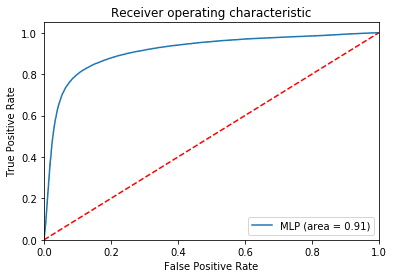

In [28]:
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MLP_ROC')
plt.show()

# Neural Network model with cross validation , accuracy result

In [29]:
from sklearn.model_selection import cross_val_score
mlp_cv_scores = cross_val_score(mlp_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [30]:
mlp_cv_scores

array([0.86537562, 0.86977318, 0.84860016, 0.77096575, 0.82581153])

In [31]:
mlp_cv_avgscores= round(mlp_cv_scores.mean(),3)
mlp_cv_avgscores

0.836

In [32]:
mlp_F1= cross_val_score(mlp_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='f1_macro')
mlp_F1

array([0.86277823, 0.86268298, 0.85076252, 0.76528877, 0.82616006])

In [33]:
from sklearn.model_selection import cross_val_predict
mlp_predicted = cross_val_predict(mlp_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [34]:
mlp_cm= confusion_matrix(df3['MIS_Status'], mlp_predicted)
mlp_cm

array([[100704,  16899],
       [ 22514,  95089]], dtype=int64)

In [36]:
type2_error = mlp_cm[1][0]/ (mlp_cm[1][0] + mlp_cm[1][1])
type2_error

0.19144069454010526

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:
mlp_precision1= round(precision_score(df3['MIS_Status'], mlp_predicted),3)
mlp_precision1

0.849

In [39]:
mlp_precision2= precision_score(df3['MIS_Status'],mlp_predicted,average='macro')
mlp_precision2

0.8331915463527695

In [40]:
mlp_precision3= precision_score(df3['MIS_Status'],mlp_predicted,average='weighted')
mlp_precision3

0.8331915463527696

In [41]:
mlp_recall1= round(recall_score(df3['MIS_Status'], mlp_predicted),3)
mlp_recall1

0.809

In [42]:
mlp_recall2= recall_score(df3['MIS_Status'],mlp_predicted,average='macro')
mlp_recall2

0.8324319957824204

In [43]:
mlp_recall3= recall_score(df3['MIS_Status'],mlp_predicted,average='weighted')
mlp_recall3

0.8324319957824206

In [44]:
mlp_aucs = cross_val_score(mlp_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='roc_auc') 
mlp_aucs

array([0.91879441, 0.92519083, 0.90623029, 0.83834307, 0.88478253])

In [45]:
mlp_aucs_avg= round(mlp_aucs.mean(),3)
mlp_aucs_avg

0.895

In [46]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(df3['MIS_Status'], mlp_predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.81728319 0.8490999 ]
recall: [0.85630469 0.80855931]
fscore: [0.83633902 0.82833386]
support: [117603 117603]
